This notebook is used to test the numerical precision of outputs that are potentially sensitive to integration issues

# Import and style

In [2]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.wcs import WCS
import scipy.ndimage as ndimage
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table
import healpy as hp

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import SymLogNorm

from minot import model

# Modify plotting parameters
dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15,
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

# Define cluster

In [3]:
cluster = model.Cluster()
cluster.R_truncation = 2000*u.kpc

                          __  __ ___ _  _  ___  ___                          
                         |  \/  |_ _| \| |/ _ \/ __|                         
                         | |\/| || || .` | (_) \__ \                         
                         |_|  |_|___|_|\_|\___/|___/                         
Modeling of the ICM (Non-)thermal content and Observables prediction Software
-----------------------------------------------------------------------------
                                                                             
Setting gNFW Planck coll. (2013) UPP.
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang


# gas mass, f_gas profile, thermal energy

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


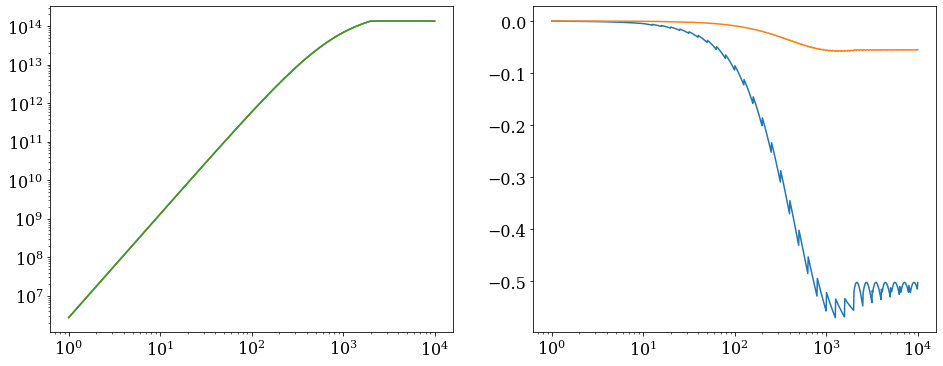

In [4]:
radius = np.logspace(0,4,1000)*u.kpc
cluster.Npt_per_decade_integ = 1000
r, p1 = cluster.get_gas_mass_profile(radius)

cluster.Npt_per_decade_integ = 10
r, p2 = cluster.get_gas_mass_profile(radius)

cluster.Npt_per_decade_integ = 30
r, p3 = cluster.get_gas_mass_profile(radius)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.loglog(r, p1)
plt.loglog(r, p2)
plt.loglog(r, p3)
plt.subplot(122)
plt.plot(r, (p2-p1)/p1*100)
plt.plot(r, (p3-p1)/p1*100)
plt.xscale('log')

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


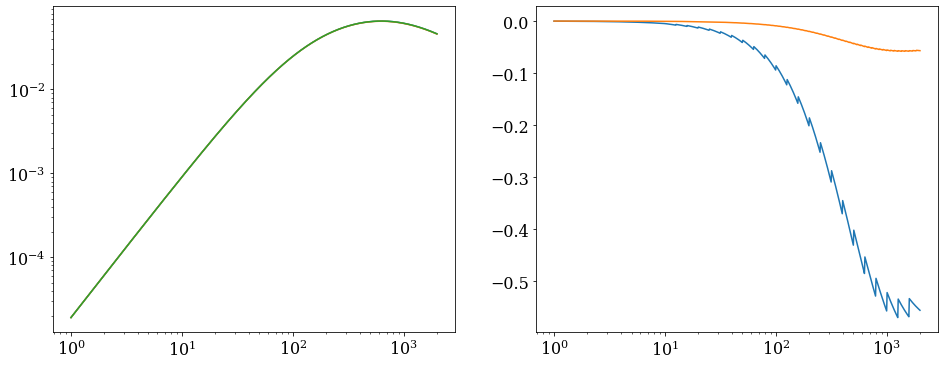

In [5]:
radius = np.logspace(0,4,1000)*u.kpc
cluster.Npt_per_decade_integ = 1000
r, p1 = cluster.get_fgas_profile(radius)

cluster.Npt_per_decade_integ = 10
r, p2 = cluster.get_fgas_profile(radius)

cluster.Npt_per_decade_integ = 30
r, p3 = cluster.get_fgas_profile(radius)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.loglog(r, p1)
plt.loglog(r, p2)
plt.loglog(r, p3)
plt.subplot(122)
plt.plot(r, (p2-p1)/p1*100)
plt.plot(r, (p3-p1)/p1*100)
plt.xscale('log')

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


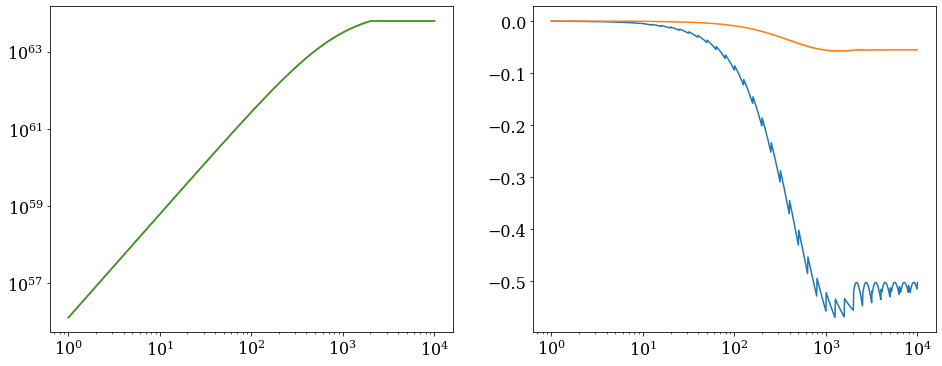

In [6]:
radius = np.logspace(0,4,1000)*u.kpc
cluster.Npt_per_decade_integ = 1000
r, p1 = cluster.get_thermal_energy_profile(radius)

cluster.Npt_per_decade_integ = 10
r, p2 = cluster.get_thermal_energy_profile(radius)

cluster.Npt_per_decade_integ = 30
r, p3 = cluster.get_thermal_energy_profile(radius)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.loglog(r, p1)
plt.loglog(r, p2)
plt.loglog(r, p3)
plt.subplot(122)
plt.plot(r, (p2-p1)/p1*100)
plt.plot(r, (p3-p1)/p1*100)
plt.xscale('log')

# CRp normalization

In [7]:
cluster.Npt_per_decade_integ = 1000
p1 = cluster._get_crp_normalization()

cluster.Npt_per_decade_integ = 10
p2 = cluster._get_crp_normalization()

cluster.Npt_per_decade_integ = 30
p3 = cluster._get_crp_normalization()

p1, p2, p3, (p2-p1)/p1*100, (p3-p1)/p3*100

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


(<Quantity [4.00135047e-10] 1 / (cm3 GeV)>,
 <Quantity [4.00135047e-10] 1 / (cm3 GeV)>,
 <Quantity [4.00135047e-10] 1 / (cm3 GeV)>,
 <Quantity [4.39291388e-13]>,
 <Quantity [5.16813397e-13]>)

# CRp density and spectrum

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


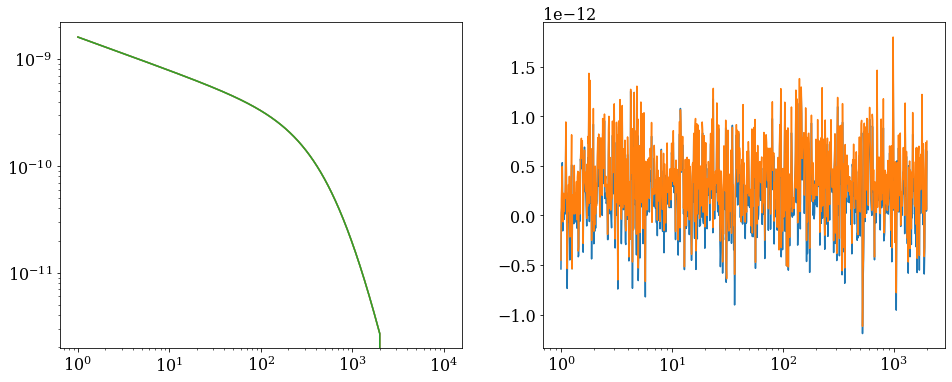

In [8]:
radius = np.logspace(0,4,1000)*u.kpc
cluster.Npt_per_decade_integ = 1000
r, p1 = cluster.get_density_crp_profile(radius)

cluster.Npt_per_decade_integ = 10
r, p2 = cluster.get_density_crp_profile(radius)

cluster.Npt_per_decade_integ = 30
r, p3 = cluster.get_density_crp_profile(radius)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.loglog(r, p1)
plt.loglog(r, p2)
plt.loglog(r, p3)
plt.subplot(122)
plt.plot(r, (p2-p1)/p1*100)
plt.plot(r, (p3-p1)/p1*100)
plt.xscale('log')

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


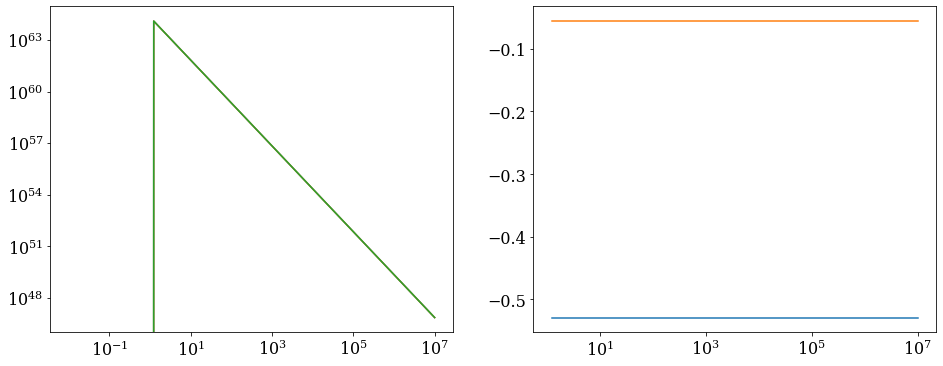

In [9]:
energy = np.logspace(-2,7,100)*u.GeV
cluster.Npt_per_decade_integ = 1000
r, p1 = cluster.get_crp_spectrum(energy, Rmax=5*u.Mpc)

cluster.Npt_per_decade_integ = 10
r, p2 = cluster.get_crp_spectrum(energy, Rmax=5*u.Mpc)

cluster.Npt_per_decade_integ = 30
r, p3 = cluster.get_crp_spectrum(energy, Rmax=5*u.Mpc)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.loglog(r, p1)
plt.loglog(r, p2)
plt.loglog(r, p3)
plt.subplot(122)
plt.plot(r, (p2-p1)/p1*100)
plt.plot(r, (p3-p1)/p1*100)
plt.xscale('log')

# CR/thermal energy

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


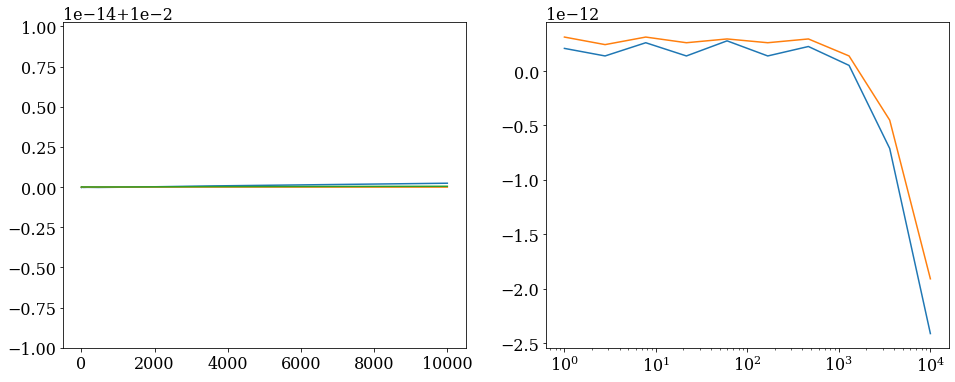

In [10]:
Emin = 1*u.MeV

radius = np.logspace(0,4,10)*u.kpc
cluster.Npt_per_decade_integ = 1000
r, p1 = cluster.get_crp_to_thermal_energy_profile(radius, Emin=Emin)

cluster.Npt_per_decade_integ = 10
r, p2 = cluster.get_crp_to_thermal_energy_profile(radius, Emin=Emin)

cluster.Npt_per_decade_integ = 30
r, p3 = cluster.get_crp_to_thermal_energy_profile(radius, Emin=Emin)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(r, p1)
plt.plot(r, p2)
plt.plot(r, p3)
plt.subplot(122)
plt.plot(r, (p2-p1)/p1*100)
plt.plot(r, (p3-p1)/p1*100)
plt.xscale('log')

# Rate: gamma, electron, neutrinos

Large errors at high energy are due to the integration over the cross section, which is define on very large pixels when the number of point per decade decreases too much.

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipyker

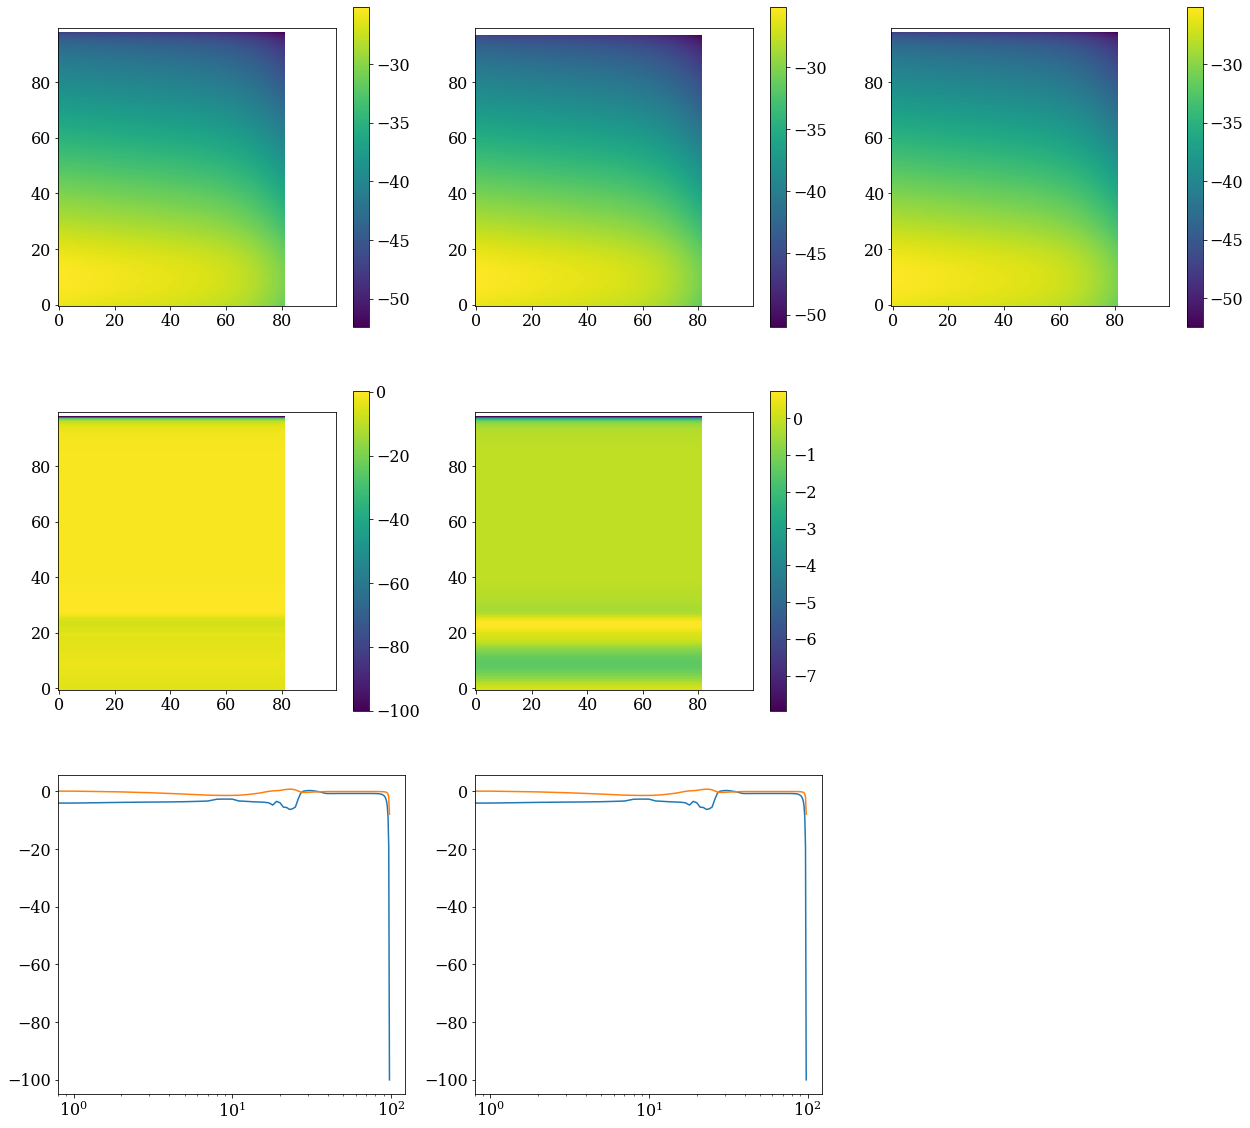

In [11]:
radius = np.logspace(0,4,100)*u.kpc
energy = np.logspace(-2,7,100)*u.GeV

cluster.Npt_per_decade_integ = 1000
p1 = cluster.get_rate_gamma(energy, radius)

cluster.Npt_per_decade_integ = 10
p2 = cluster.get_rate_gamma(energy, radius)

cluster.Npt_per_decade_integ = 30
p3 = cluster.get_rate_gamma(energy, radius)


plt.figure(1, figsize=(20,20))
plt.subplot(331)
plt.imshow(np.log10(p1.value), origin='lower')
plt.colorbar()
plt.subplot(332)
plt.imshow(np.log10(p2.value), origin='lower')
plt.colorbar()
plt.subplot(333)
plt.imshow(np.log10(p3.value), origin='lower')
plt.colorbar()
plt.subplot(334)
plt.imshow((p2.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(335)
plt.imshow((p3.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(337)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,0])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,0])
plt.xscale('log')
plt.subplot(338)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,5])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,5])
plt.xscale('log')

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-pa

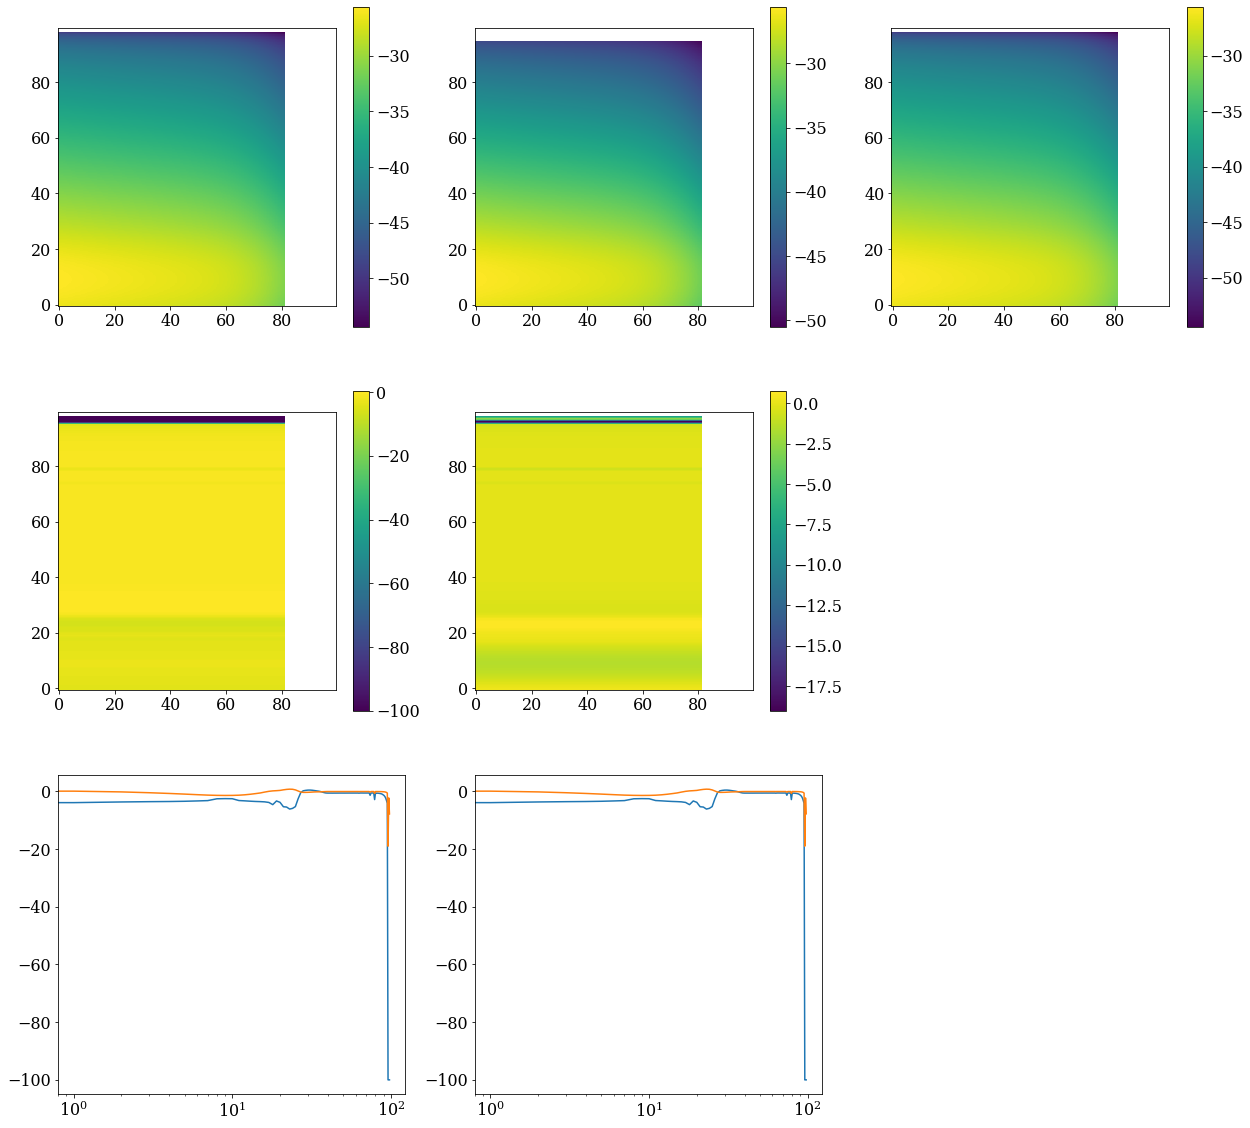

In [12]:
radius = np.logspace(0,4,100)*u.kpc
energy = np.logspace(-2,7,100)*u.GeV

cluster.Npt_per_decade_integ = 1000
p1 = cluster.get_rate_cre2(energy, radius)

cluster.Npt_per_decade_integ = 10
p2 = cluster.get_rate_cre2(energy, radius)

cluster.Npt_per_decade_integ = 30
p3 = cluster.get_rate_cre2(energy, radius)

plt.figure(1, figsize=(20,20))
plt.subplot(331)
plt.imshow(np.log10(p1.value), origin='lower')
plt.colorbar()
plt.subplot(332)
plt.imshow(np.log10(p2.value), origin='lower')
plt.colorbar()
plt.subplot(333)
plt.imshow(np.log10(p3.value), origin='lower')
plt.colorbar()
plt.subplot(334)
plt.imshow((p2.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(335)
plt.imshow((p3.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(337)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,0])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,0])
plt.xscale('log')
plt.subplot(338)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,5])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,5])
plt.xscale('log')

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-pa

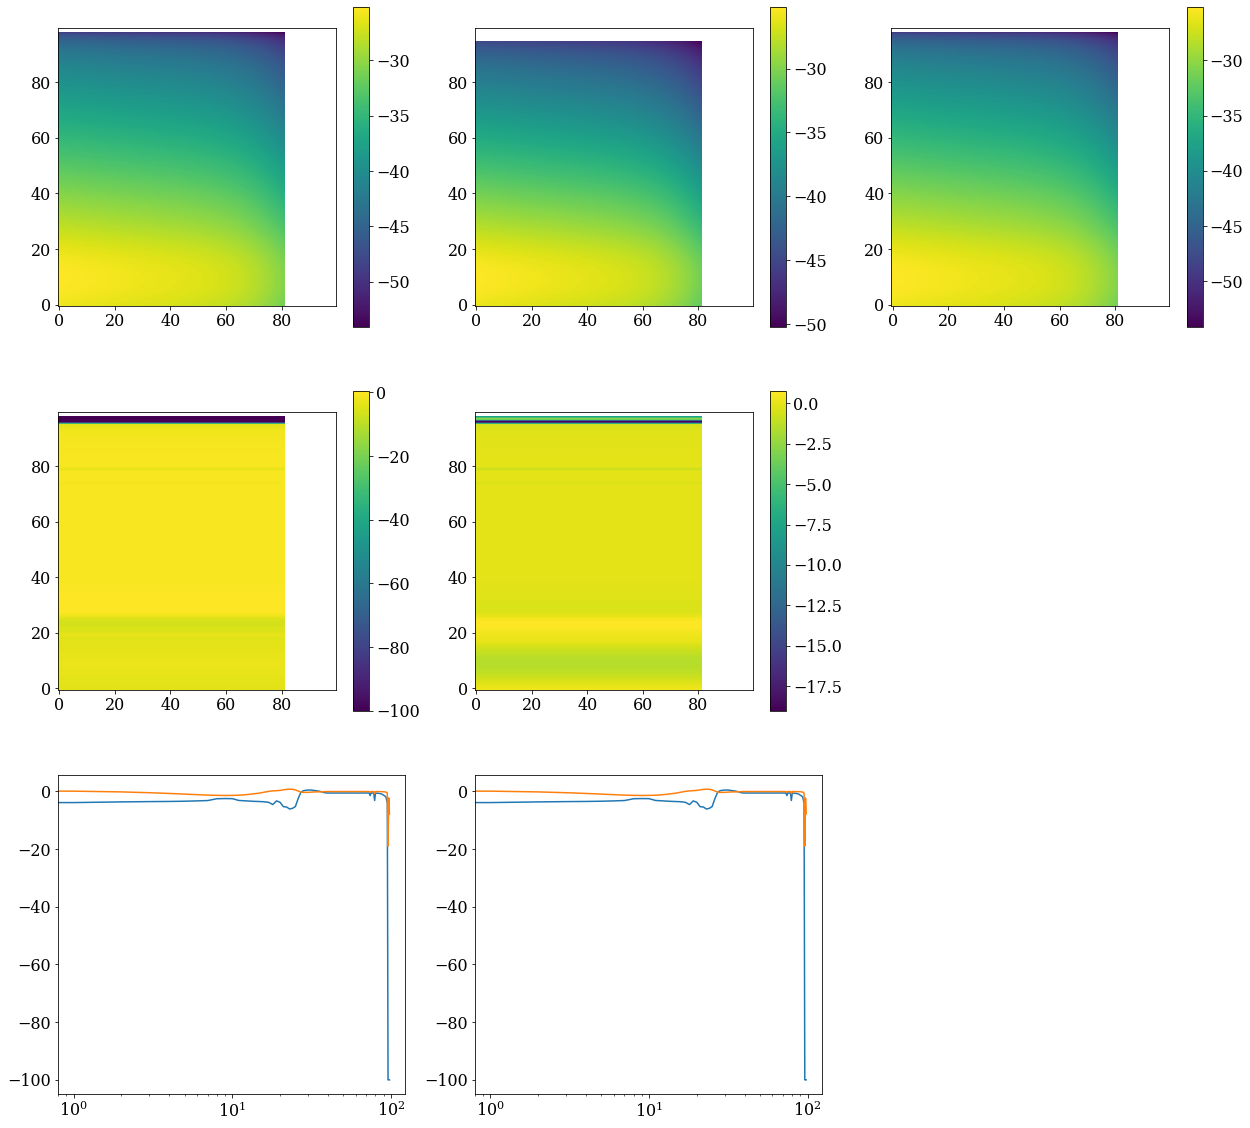

In [13]:
radius = np.logspace(0,4,100)*u.kpc
energy = np.logspace(-2,7,100)*u.GeV

cluster.Npt_per_decade_integ = 1000
p1 = cluster.get_rate_neutrino(energy, radius)

cluster.Npt_per_decade_integ = 10
p2 = cluster.get_rate_neutrino(energy, radius)

cluster.Npt_per_decade_integ = 30
p3 = cluster.get_rate_neutrino(energy, radius)

plt.figure(1, figsize=(20,20))
plt.subplot(331)
plt.imshow(np.log10(p1.value), origin='lower')
plt.colorbar()
plt.subplot(332)
plt.imshow(np.log10(p2.value), origin='lower')
plt.colorbar()
plt.subplot(333)
plt.imshow(np.log10(p3.value), origin='lower')
plt.colorbar()
plt.subplot(334)
plt.imshow((p2.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(335)
plt.imshow((p3.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(337)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,0])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,0])
plt.xscale('log')
plt.subplot(338)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,5])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,5])
plt.xscale('log')

# CRe distribution

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-pa

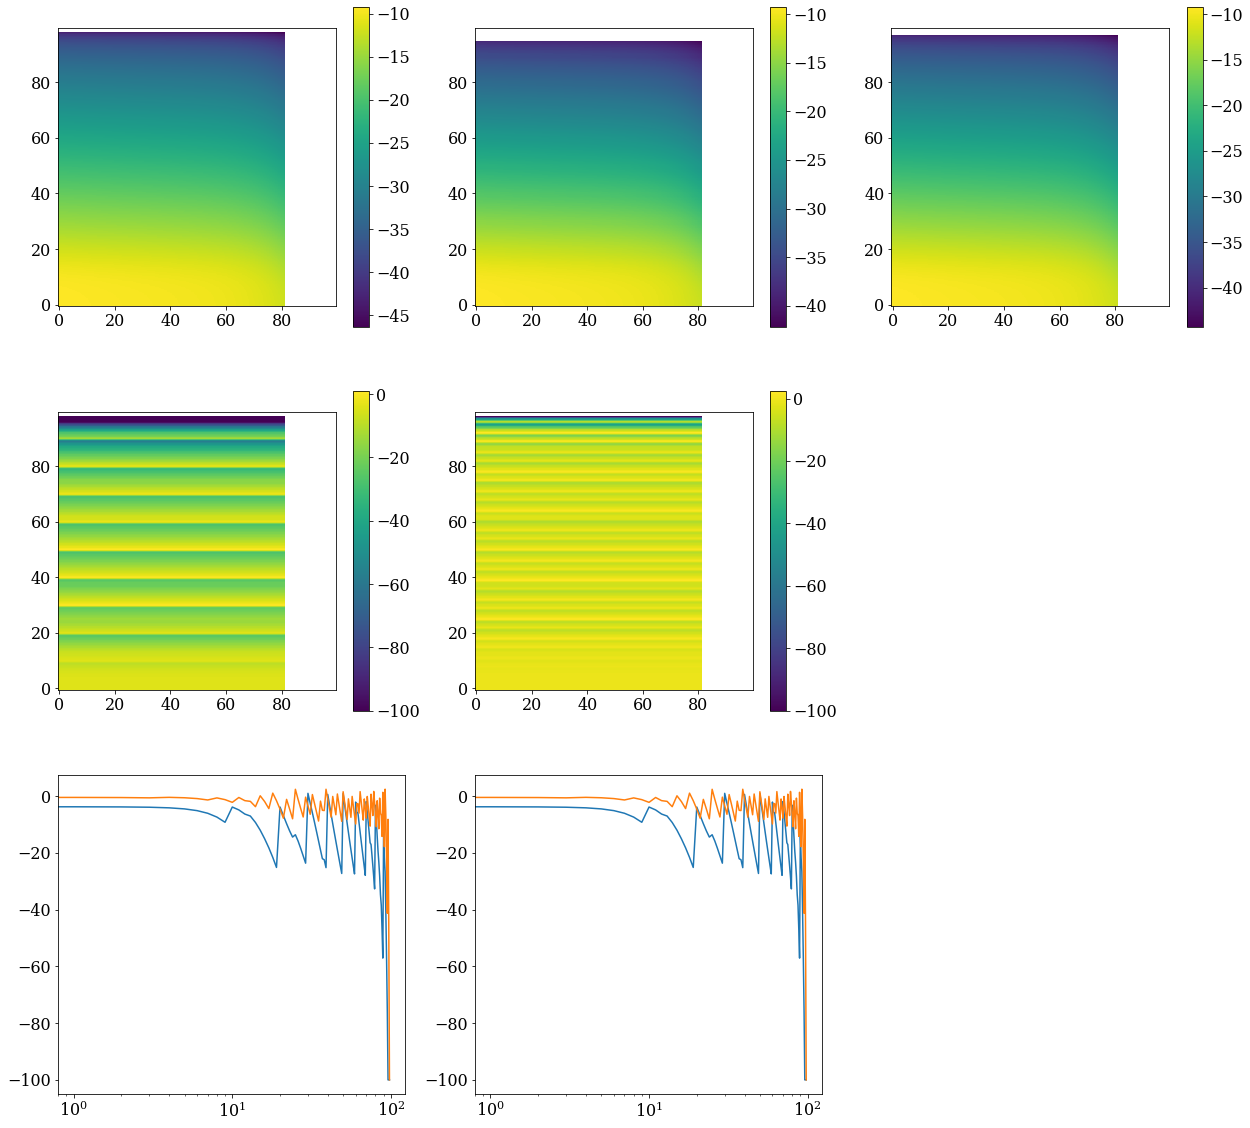

In [14]:
radius = np.logspace(0,4,100)*u.kpc
energy = np.logspace(-2,7,100)*u.GeV

cluster.Npt_per_decade_integ = 100
p1 = cluster.get_cre2_2d(energy, radius)

cluster.Npt_per_decade_integ = 10
p2 = cluster.get_cre2_2d(energy, radius)

cluster.Npt_per_decade_integ = 30
p3 = cluster.get_cre2_2d(energy, radius)

plt.figure(1, figsize=(20,20))
plt.subplot(331)
plt.imshow(np.log10(p1.value), origin='lower')
plt.colorbar()
plt.subplot(332)
plt.imshow(np.log10(p2.value), origin='lower')
plt.colorbar()
plt.subplot(333)
plt.imshow(np.log10(p3.value), origin='lower')
plt.colorbar()
plt.subplot(334)
plt.imshow((p2.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(335)
plt.imshow((p3.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(337)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,0])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,0])
plt.xscale('log')
plt.subplot(338)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,5])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,5])
plt.xscale('log')

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


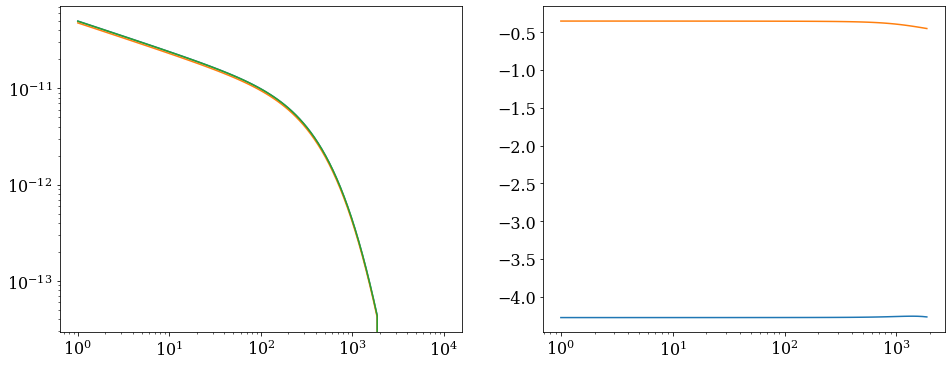

In [15]:
radius = np.logspace(0,4,100)*u.kpc
cluster.Npt_per_decade_integ = 100
r, p1 = cluster.get_density_cre2_profile(radius)

cluster.Npt_per_decade_integ = 10
r, p2 = cluster.get_density_cre2_profile(radius)

cluster.Npt_per_decade_integ = 30
r, p3 = cluster.get_density_cre2_profile(radius)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.loglog(r, p1)
plt.loglog(r, p2)
plt.loglog(r, p3)
plt.subplot(122)
plt.plot(r, (p2-p1)/p1*100)
plt.plot(r, (p3-p1)/p1*100)
plt.xscale('log')

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


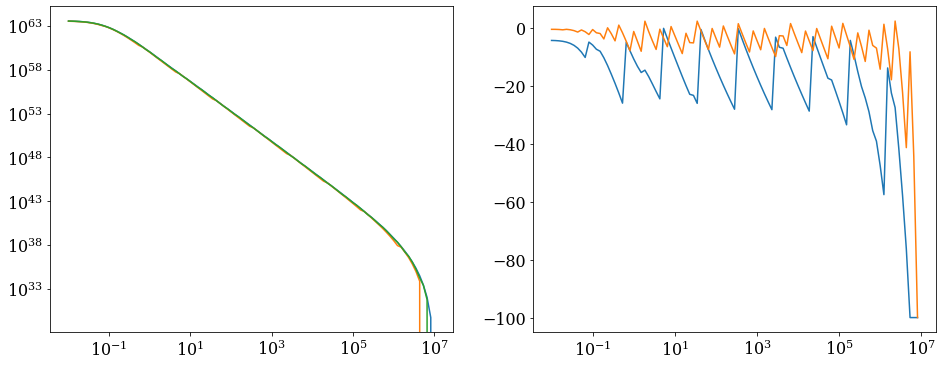

In [16]:
energy = np.logspace(-2,7,100)*u.GeV
cluster.Npt_per_decade_integ = 100
r, p1 = cluster.get_cre2_spectrum(energy, Rmax=5*u.Mpc)

cluster.Npt_per_decade_integ = 10
r, p2 = cluster.get_cre2_spectrum(energy, Rmax=5*u.Mpc)

cluster.Npt_per_decade_integ = 30
r, p3 = cluster.get_cre2_spectrum(energy, Rmax=5*u.Mpc)

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.loglog(r, p1)
plt.loglog(r, p2)
plt.loglog(r, p3)
plt.subplot(122)
plt.plot(r, (p2-p1)/p1*100)
plt.plot(r, (p3-p1)/p1*100)
plt.xscale('log')

# Synchrotron and IC rate

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-pa

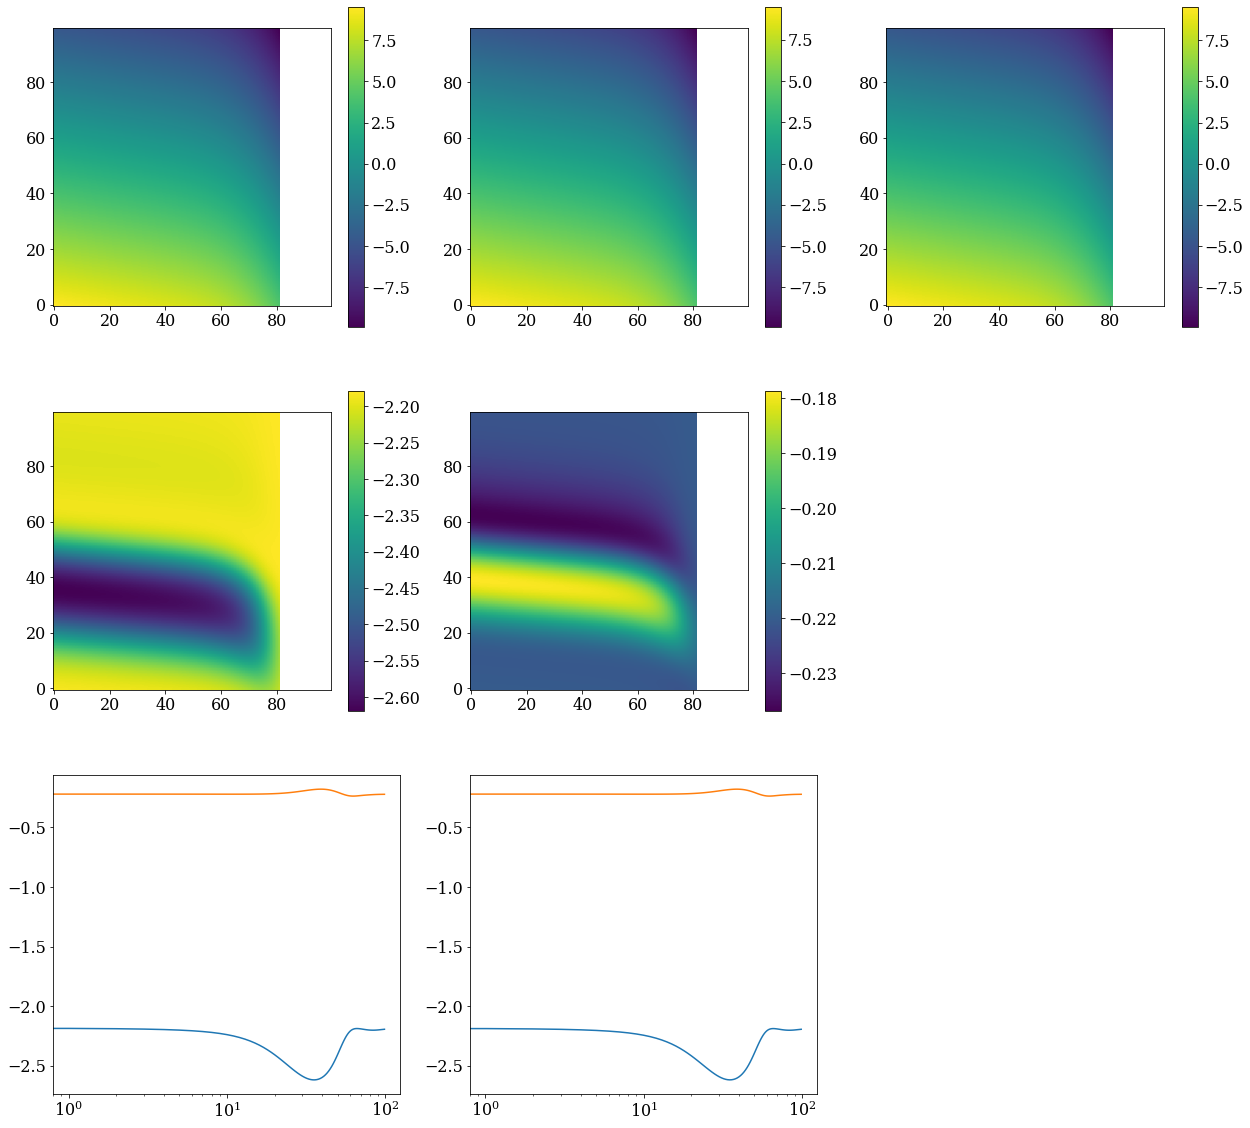

In [17]:
energy=np.logspace(-9,-2,100)*u.eV
radius=np.logspace(0,4,100)*u.kpc

cluster.Npt_per_decade_integ = 100
p1 = cluster.get_rate_synchrotron(energy, radius)

cluster.Npt_per_decade_integ = 10
p2 = cluster.get_rate_synchrotron(energy, radius)

cluster.Npt_per_decade_integ = 30
p3 = cluster.get_rate_synchrotron(energy, radius)

plt.figure(1, figsize=(20,20))
plt.subplot(331)
plt.imshow(np.log10(p1.value), origin='lower')
plt.colorbar()
plt.subplot(332)
plt.imshow(np.log10(p2.value), origin='lower')
plt.colorbar()
plt.subplot(333)
plt.imshow(np.log10(p3.value), origin='lower')
plt.colorbar()
plt.subplot(334)
plt.imshow((p2.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(335)
plt.imshow((p3.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(337)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,0])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,0])
plt.xscale('log')
plt.subplot(338)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,5])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,5])
plt.xscale('log')

Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value
Setting number of point per decade (for integration) value


/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/Users/adam/Project/anaconda3/envs/env37/lib/python3.7/site-pa

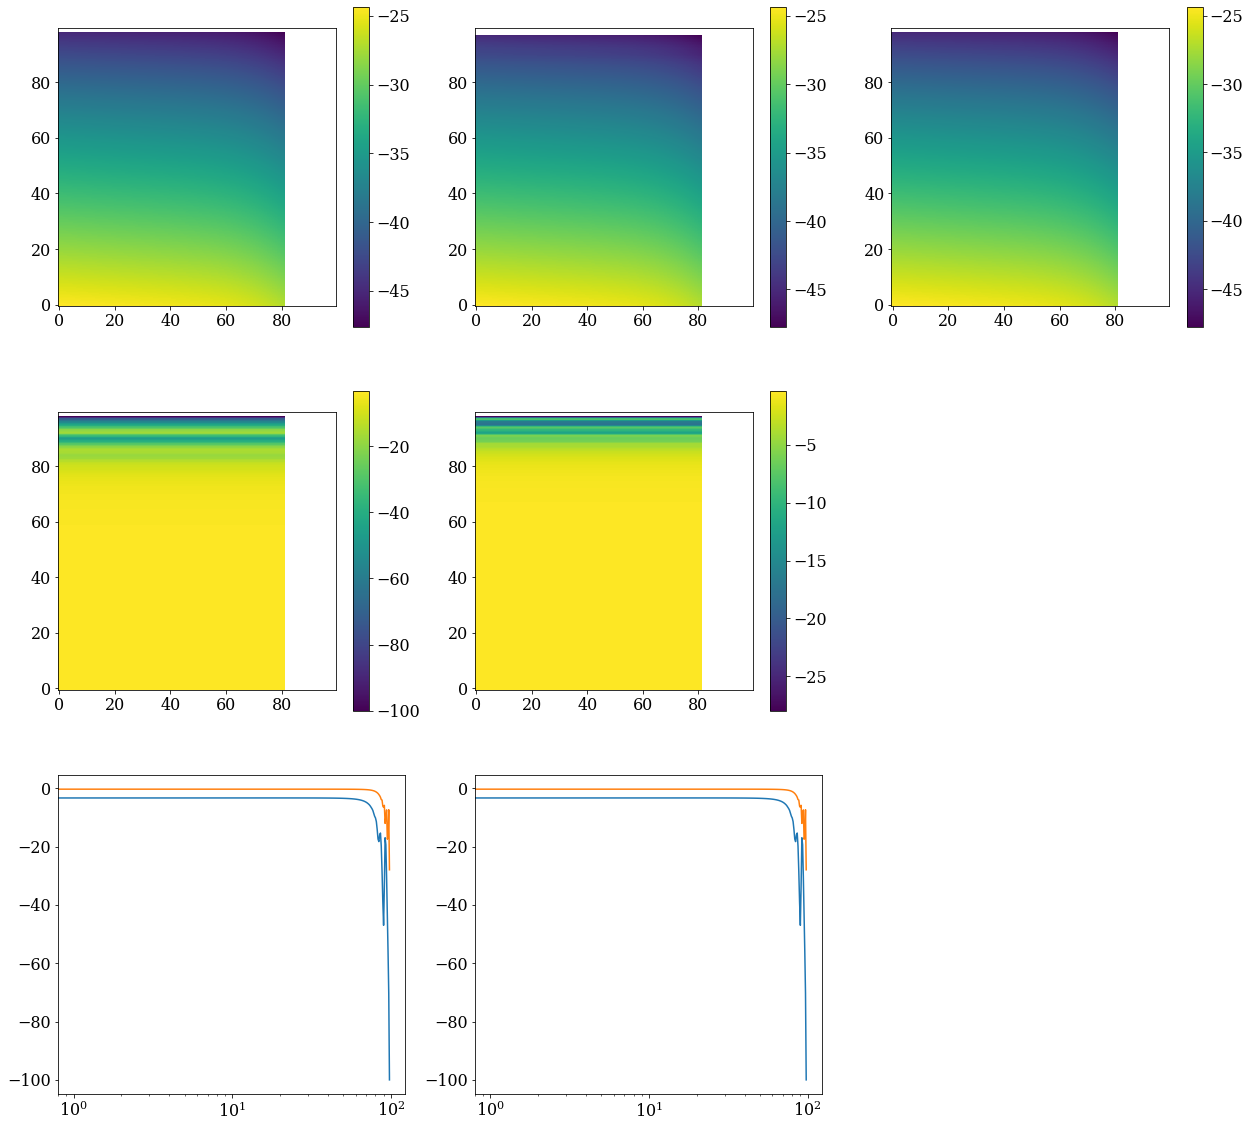

In [18]:
energy=np.logspace(-2,7,100)*u.GeV
radius=np.logspace(0,4,100)*u.kpc

cluster.Npt_per_decade_integ = 100
p1 = cluster.get_rate_ic(energy, radius)

cluster.Npt_per_decade_integ = 10
p2 = cluster.get_rate_ic(energy, radius)

cluster.Npt_per_decade_integ = 30
p3 = cluster.get_rate_ic(energy, radius)

plt.figure(1, figsize=(20,20))
plt.subplot(331)
plt.imshow(np.log10(p1.value), origin='lower')
plt.colorbar()
plt.subplot(332)
plt.imshow(np.log10(p2.value), origin='lower')
plt.colorbar()
plt.subplot(333)
plt.imshow(np.log10(p3.value), origin='lower')
plt.colorbar()
plt.subplot(334)
plt.imshow((p2.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(335)
plt.imshow((p3.value-p1.value)/p1.value*100, origin='lower')
plt.colorbar()
plt.subplot(337)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,0])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,0])
plt.xscale('log')
plt.subplot(338)
plt.plot(((p2.value-p1.value)/p1.value*100)[:,5])
plt.plot(((p3.value-p1.value)/p1.value*100)[:,5])
plt.xscale('log')